# Exploratory data analysis with Heart Disease dataset

[This dataset](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease) from Kaggle displays imformation about the principal inidicators of heart disease from 2020 CDC survey of $\sim$ 400k adults. 

In this exploratory data analysis we will search for variables correlated with the Heart Diesease condition, witch could be used to find the susceptibility of a person to possess such condition. This is the first step on the construction of a machine learning model that will be used to predict the likelihood of a heart disease given some relevant parameters. 

In [1]:
# importing the necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# importing the data from csv file 
data = pd.read_csv('heart_2020_cleaned.csv')

data.head() # looking at the first 5 rows

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


We habe 

In [2]:
# defining a pie chart function 

def pie_chart(df,angle):
    idx = df.value_counts().index
    vls = df.value_counts().values

    fig = plt.figure(figsize=(6,6),facecolor = 'white')

    plt.pie(x= vls, labels= idx, autopct= '%1.1f%%',startangle=angle,
            colors = sns.color_palette("RdYlBu_r")[:len(idx)])

## Etnical representativity

One of the most important aspects of a machine learning model is knowing it's applicability. Since our data is a medical dataset of a specific population we need to know witch aspects of the population are represented and will be taken into accont when the model is trained. This way we can be clear about the limitations of the model and the limitations of the data itself, if it's biased in some way or another.  

It is important to investigate how much of each ethnicity is represented in this dataset.

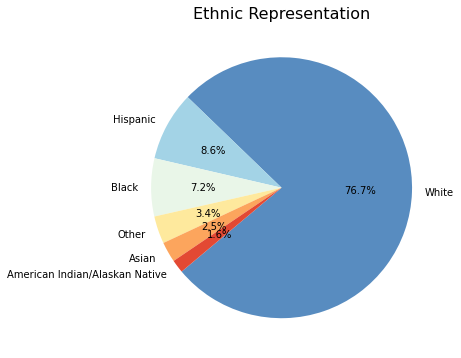

In [3]:
# plotting the ethnic diversity of the sample 

pie_chart(data.Race,220)

plt.title('Ethnic Representation',fontsize = 16)
plt.show()

The first thing we can notice on this pie chart is the majority of white people represented in the dataset. Other ethnicities have less than 10% of representativity, wich means that the model will be biased on the correct classification of a white person then a black person, for example. This limits our? future model, narrowing its applicability on other ethnical groups. 

# Sex representativity 

The sex representativity is also an important feature, since cardiovascular disiases are [known to be correlated with sex](https://gh.bmj.com/content/2/2/e000298.altmetrics).

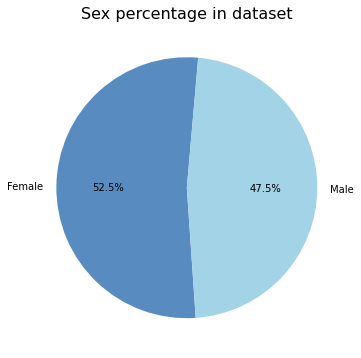

In [165]:
# plotting the ethnic diversity of the sample 

pie_chart(data.Sex,85)

plt.title("Sex percentage in dataset",fontsize = 16)

plt.show()

We can see that in our dataset we also have an indication of some correlation between being a male individual and having a heart disease. 

### The number of cases of heart disease cases are almost 40% higher in male patients than in female ones. 

We can see that the male individuals have a higher risk of developing heart diseases. 

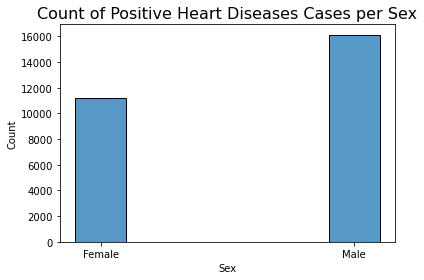

In [23]:
sns.histplot(data = data[data.HeartDisease == 'Yes'],
             x = 'Sex', multiple='dodge', shrink=0.2)

plt.title('Count of Positive Heart Diseases Cases per Sex',fontsize = 16)
plt.show()

In [170]:
data[data.HeartDisease == 'Yes'].Sex.value_counts(normalize = True)

Male      0.589596
Female    0.410404
Name: Sex, dtype: float64

## Age Groups Representativity 


Are all age groups well represented in this dataset? Counting and normalizing the age group counts we can see that we have a low satandart deviation, about 2%, in the percentage of representativity, with a 7.5% mean. So yes, we have a good representativity of all age groups. 

In [254]:
pd.DataFrame(data.AgeCategory.value_counts(normalize = True).sort_index()*100)

,AgeCategory
18-24,6.586720
25-29,5.301834
30-34,5.864069
35-39,6.425992
40-44,6.568583
45-49,6.814053
50-54,7.936960
55-59,9.305024
60-64,10.533623
65-69,10.679029


### Increasing positive cases as age increases

The absolute value of positive hart disease cases increases with age groups.  

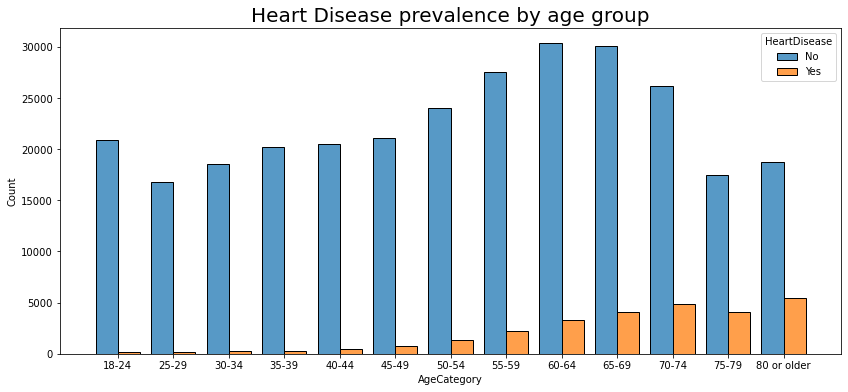

In [21]:
fig  = plt.figure(figsize=(14,6))
sns.histplot(data = data.sort_values('AgeCategory'),
            x = 'AgeCategory', hue= 'HeartDisease',
            multiple="dodge",stat='count', shrink=0.8)

plt.title('Heart Disease prevalence by age group',fontsize = 20)
plt.show()

## Smoking as a Risk Factor

Smoking is a risk factor for heart diseases, but before jumping on this conclusions we must ask one question: how many smokers are in our dataset? 

To be able to correlate smoking and heart diseases we must first have an estimative of how many smokers we have in our population. The following graph shows number of smokers and non-smokers ordered by age groups. Where we can see that almost all groups have less smokers than non-smokers.

C:\Users\Rigminer\AppData\Local\Temp/ipykernel_3324/1007134353.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


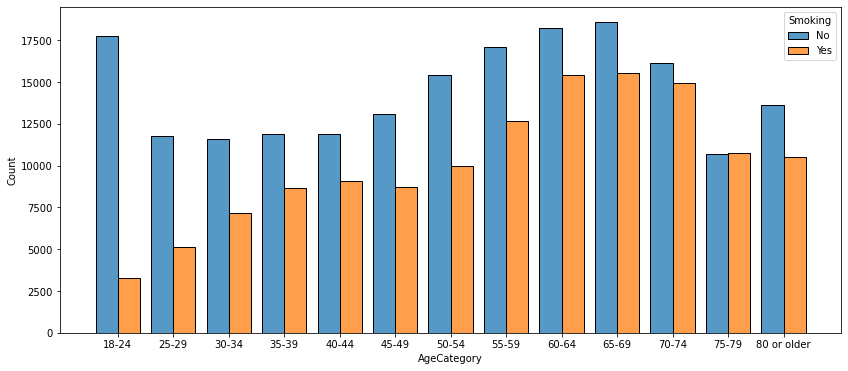

In [20]:
fig  = plt.figure(figsize=(14,6))
sns.histplot(data = data.sort_values('AgeCategory'),
            x = 'AgeCategory', hue= 'Smoking',multiple="dodge", shrink=0.8)

fig.show()

## Share of heart disease occurences in smokers and non-smokers

#### Overall 

Without the age category what are the odds of having a heart disease being a smoker? 

In [234]:
# what is the share of smokers and non-smokers with heart disease? 

# Smokers with and without Heart Disease
data[data.Smoking == 'Yes'].HeartDisease.value_counts(normalize = True)

No     0.878423
Yes    0.121577
Name: HeartDisease, dtype: float64

In [236]:
# Non-Smokers with and without Heart Disease
data[data.Smoking == 'No'].HeartDisease.value_counts(normalize = True)

No     0.939666
Yes    0.060334
Name: HeartDisease, dtype: float64

#### Smokers have more than 12% chance of having a heart disease, against only 6% of non-smokers. 

### Share of heart disease occurences in smokers and non-smokers by age group. 

Including the age factor we can see that the total number of cases increase as the age group leans to higher ages. Since all age groups are well represented we can assure that this is in fact a valid assessment. From the age distribution we can evaluate the following characteristics:

- bigger share of non-smokers with heart diseases for the 18-14 and 25-29 age groups;
- crescent share of smokers with heart diseases for older age groups.

The first consideration might be an indicative that heart diseases for the younger population might probably be related with other risk factors, witch are not considered here. 

The second item can be an indicator of the risks of long therm smoking habits, but we lack the data of 'years since started smoking' to corroborate this hypothesis. The only thing we can infer is that the patients with heart diseases in the older age groups have a bigger chance to be smokers than non-smokers. 

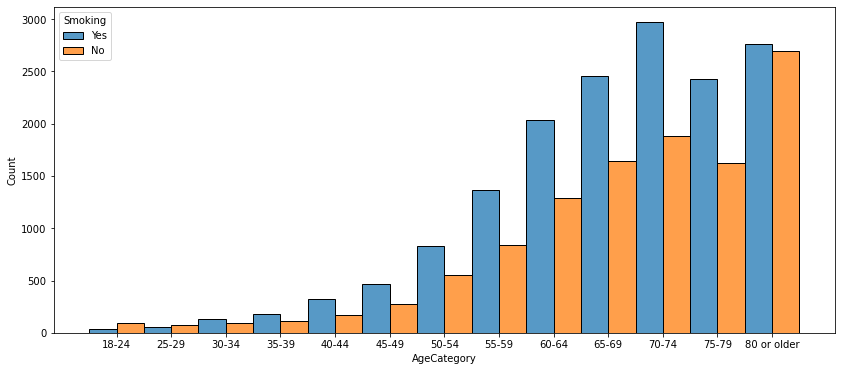

In [241]:
fig  = plt.figure(figsize=(14,6))
sns.histplot(data = data[data.HeartDisease == "Yes"].sort_values('AgeCategory'),
            x = 'AgeCategory', hue= 'Smoking',multiple="dodge",stat='count')

plt.title('',fontsize = 20)
plt.show()